# Convolución

En procesamiento de imagenes, un núcleo, kernel, matriz o `filtro de convolución` es una matriz pequeña que se utiliza para desenfoque, enfoque, realce, detección de bordes y más. Esto se logra realizando una `convolución` entre un filtro y una imagen.

---
La definición matemática de la convolución es la siguiente:

$${\displaystyle g(x,y)=\omega *f(x,y)=\sum _{s=-a}^{a}{\sum _{t=-b}^{b}{\omega (s,t)f(x-s,y-t)}},}$$

donde ${\displaystyle g(x,y)}$ es la imagen filtrada, ${\displaystyle f(x,y)}$ es la imagen original, ${\displaystyle \omega }$ es el filtro. 

Cada elemento del filtro es considerado por ${\displaystyle -a\leq s\leq a}$ y ${\displaystyle -b\leq t\leq b}$. [Aquí](https://en.wikipedia.org/wiki/Kernel_(image_processing)) pueden encontrar una lista de algunos filtros que suelen utilizarse en procesamiento de imagenes.

---

In [1]:
from IPython.display import Image
Image(url='https://tenor.com/es/ver/punch-face-slow-motion-gif-9743765.gif')  

`En la siguiente imagen podemos ver el resultado de aplicar un filtro detector de bordes a una imagen en blanco y negro de unas monedas.`

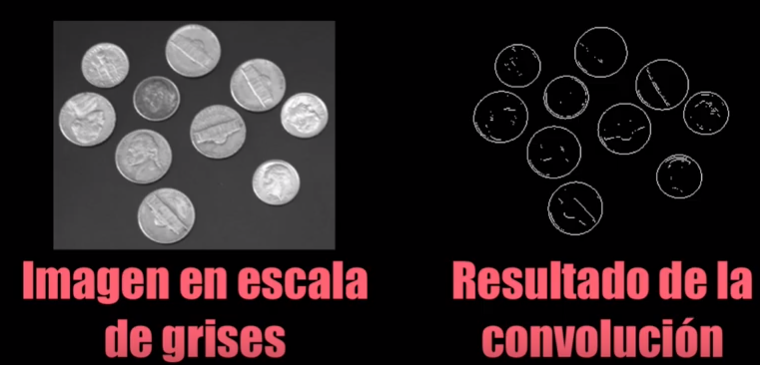

In [2]:
Image(filename='a.png')

---
# Todo bien con la matemática, pero vamos a explicar el proceso de convolución de una manera más intuitiva...

#### En el siguiente ejemplo tenemos una imagen (6x6 pixeles) y un filtro (3x3). Lo que queremos hacer es realizar la convolución de la imagen con el filtro.

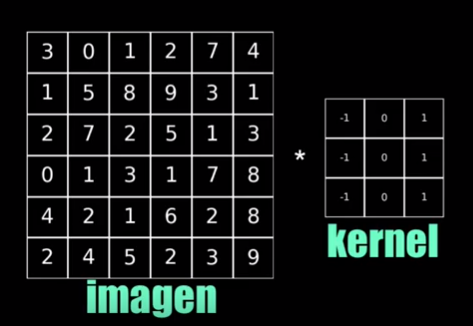

In [3]:
Image(filename='1.png')

#### Para ello vamos recorriendo la imagen (de izquierda a derecha y de arriba hacia abajo), desplazandonos 1 píxel en cada paso (no necesariamente tiene que ser 1 píxel, podrían ser más). En cada paso, vamos a calcular el producto punto de la porción de imagen correspondiente y el filtro, como se puede ver en la siguiente imagen.

#### [Aquí](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices) pueden encontrar más información sobre la multiplicación de matrices.

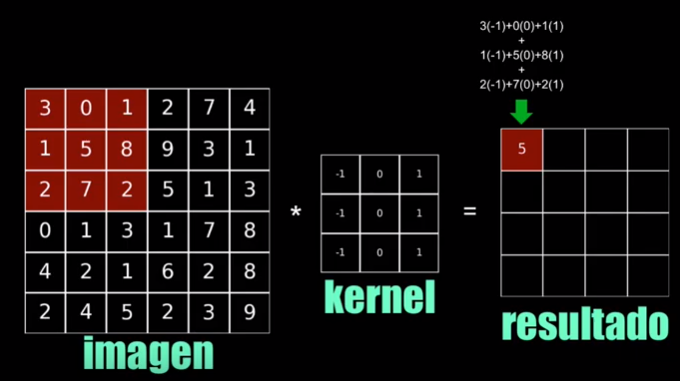

In [4]:
Image(filename='2.png')

#### Una vez finalizado el cálculo del producto punto, nos desplazamos un píxel y repetimos el cálculo para la nueva porción de la imagen original.

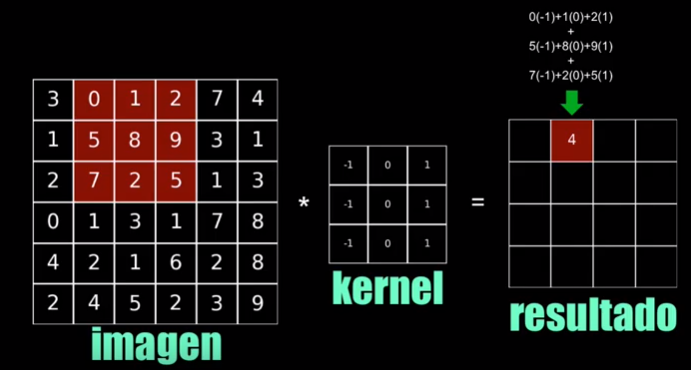

In [5]:
Image(filename='3.png')

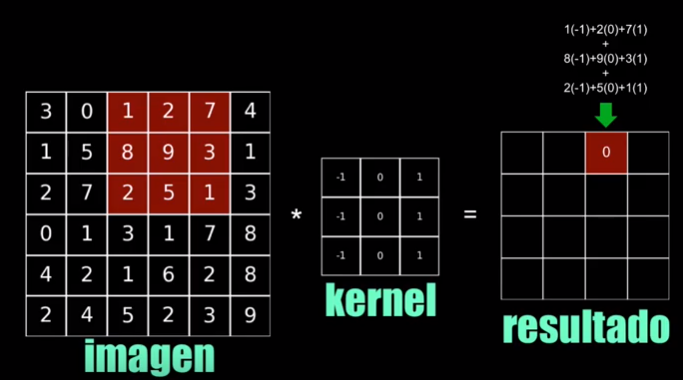

In [6]:
Image(filename='4.png')

#### Recorriendo de izquierda a derecha y de arriba a abajo, completamos todos los productos puntos, obteniendo la nueva imagen resultante. 

#### Observar que las dimensiones de la matriz resultante se vieron reducidas.

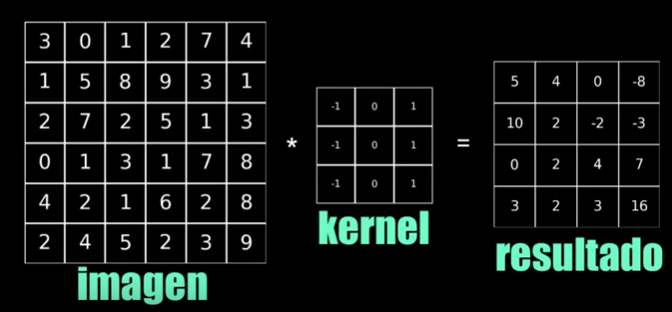

In [7]:
Image(filename='5.png')

---
# Y qué pasa cuando tenemos un imagen a color (RGB)?

#### El proceso es el mismo, con la diferencia de que ahora nuestra imagen original está formada por 3 matrices y por lo tanto vamos a necesitar 3 filtros. La convolución se realiza para cada plano de la imagen y con cada plano del filtro, luego se suman los valores obtenidos por cada filtro.

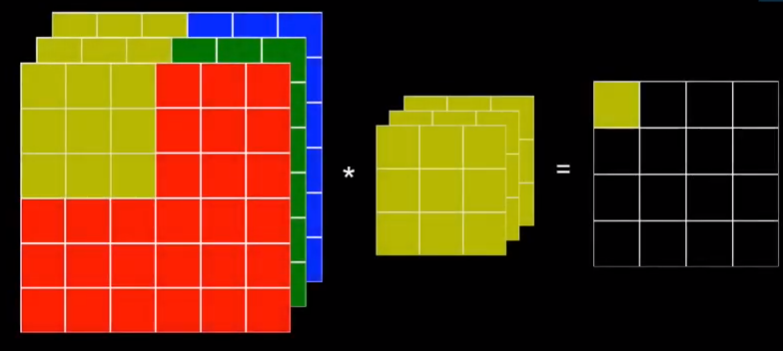

In [8]:
Image(filename='aa.png')

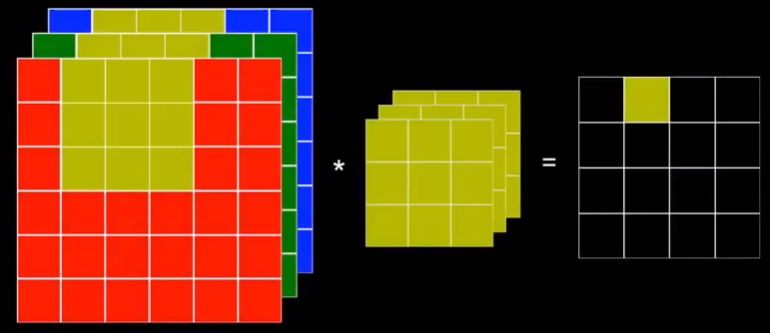

In [9]:
Image(filename='bb.png')

#### Observen las dimensiones de cada matriz. En primer lugar al tratarse de una imagen RGB de 6x6 píxeles, la dimensión total de dicha imagen es de `6x6x3`, luego como tenemos 3 filtros de 3x3, su dimensión es de `3x3x3`. Sin embargo, el resultado de la convolución tiene la dimensión `4x4x1`, ya que sumamos los resultados de cada filtro.

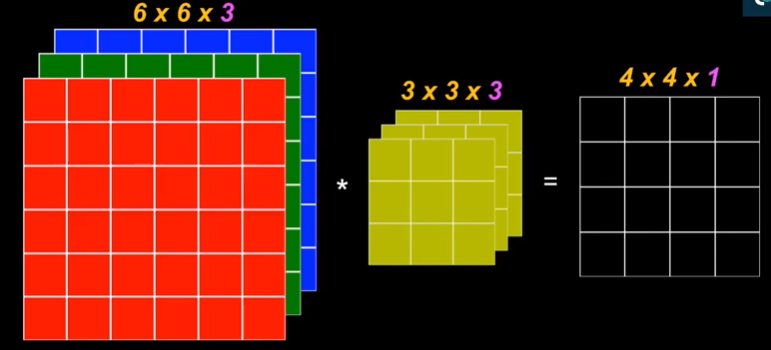

In [10]:
Image(filename='cc.png')

## Para más información vean el siguiente [video](https://www.youtube.com/watch?v=ySbmdeqR0-4&list=PL9E7H1rzXKFKV9XIXBxwlgubk_2EZMrcB&index=2).

---
# Ejemplo en python de convolución de una imagen con un filtro que detecta bordes

Antes que nada, para poder ejecutar las líneas de código que vienen a continuación, van a tener que instalar la librería `scikit-image`:

In [11]:
#!pip install scikit-image

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('image.jpg') #Load the image
img = color.rgb2gray(img)    #Convert the image to grayscale (1 channel)

kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
print("Filtro utilizado:")
print(kernel)
print(" ")

#We use 'valid' which means we do not add zero padding to our image
edges = scipy.signal.convolve2d(img, kernel, 'valid')
#print('\n First 5 columns and rows of the edges matrix: \n', edges[:5,:5]*255)

#Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

Filtro utilizado:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
 


/home/nacho/miniconda3/envs/ds/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


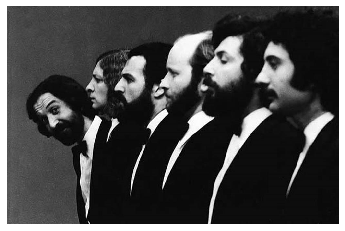

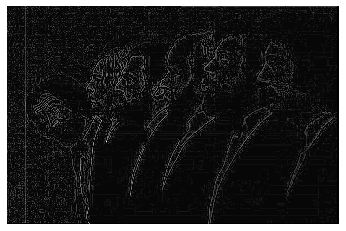

In [2]:
#Original
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off');

#Edges
plt.figure()
plt.imshow(edges_equalized, cmap=plt.cm.gray) #plot the edges_clipped
plt.axis('off');

`Ejercicio: Probar diferentes filtros en difentes imagenes.`

## `Recuerden que los coeficientes de los filtros en una red CNN son parámetros de la red y es la propia red que aprende cuales son los mejores filtros que extraen más features de las imagenes y por ende mejoran el accuracy de la red. Lo que hicimos aquí fue sólo un ejemplo de como funciona la convolución, usando como filtro uno que se sabe que sirve para detectar bordes.`